# <center>**Travel Insurance Prediction**
---
<center>Final Project Group 2 DS 30

# <center>**STAGE 2**

In [57]:
#import packages
import numpy as np
import datetime
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option ("display.max_rows", 99)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import plotly.express as pltx


# Definisi

- Age : Usia Nasabah
- Employment Type : Tipe Pekerjaan Nasabah
- GraduateOrNot : Apakah Nasabah Lulus Perguruan Tinggi Atau Tidak
- AnnualIncome : Penghasilan Tahunan Nasabah dalam Rupee India
- FamilyMembers : Jumlah Anggota Keluarga Nasabah
- ChronicDiseases : Apakah Pelanggan Menderita Penyakit kronis
- FrequentFlyer : Riwayat Pemesanan Tiket Pesawat nasabah/seberapa sering nasabah melakukan perjalanan dengan pesawat
- EverTravelledAbroad : Apakah Nasabah Pernah Bepergian Ke Luar Negeri
- TravelInsurance : Apakah Pelanggan Membeli Asuransi Perjalanan Atau Tidak

# Overview

In [58]:
df = pd.read_csv('/Users/aryannovario/Documents/Rakamin/Batch 30/Final Project/TravelInsurancePrediction.csv')
df.shape

(1987, 10)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [60]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [61]:
df.tail()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


# EDA

# 1. Data Cleansing
### A. Drop Unnecesary Feature and Handle missing values

In [62]:
#Drop Fitur Unnamed: 0
df=df.drop(['Unnamed: 0'], axis=1)

In [63]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [64]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

### B. Handle duplicated data

In [65]:
df.duplicated().sum()

738

In [66]:
print("Jumlah duplicated data: ", df.duplicated().sum())


Jumlah duplicated data:  738


### C. Handle outliers

In [67]:
# Describe the data to get the quartiles
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [68]:
# Split data 
df["ChronicDiseases"]= df["ChronicDiseases"].map({0: "No", 1: "Yes"})
df["TravelInsurance"]= df["TravelInsurance"].map({0: "not purchased", 1: "purchased"})


In [69]:
#Split data types

cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
num =  ['Age', 'AnnualIncome', 'FamilyMembers']


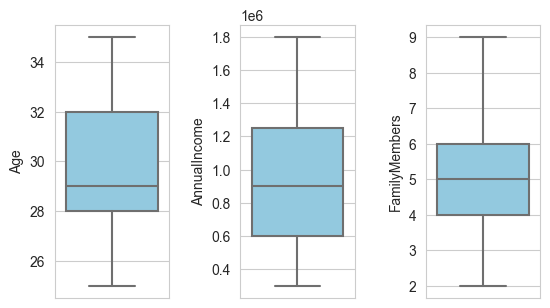

In [70]:
# Visualize boxplot to check for outliers
plt.figure(figsize=(20,12))
for i in range(0, len(num)) :
  plt.subplot(4,11, i+2)
  sns.boxplot (y=df [num[i]], color='skyblue', orient='v') 
plt.tight_layout ()

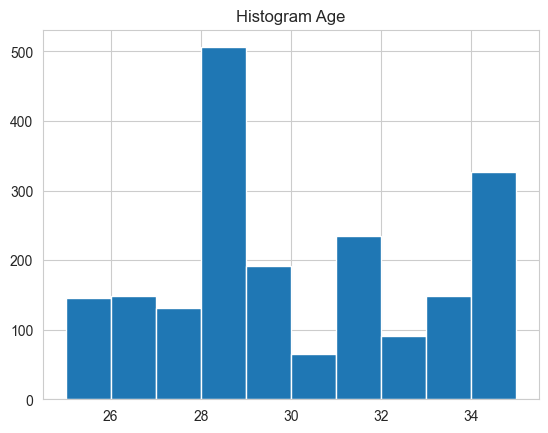

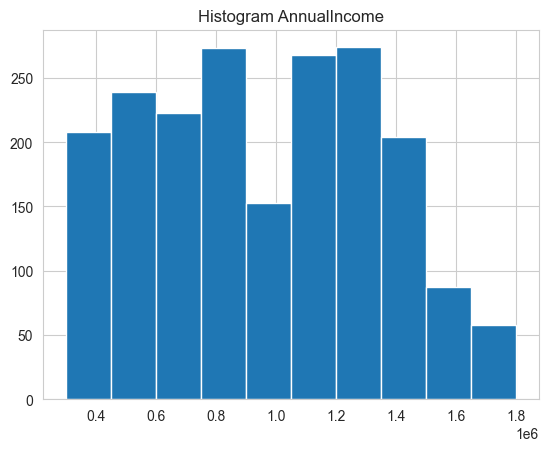

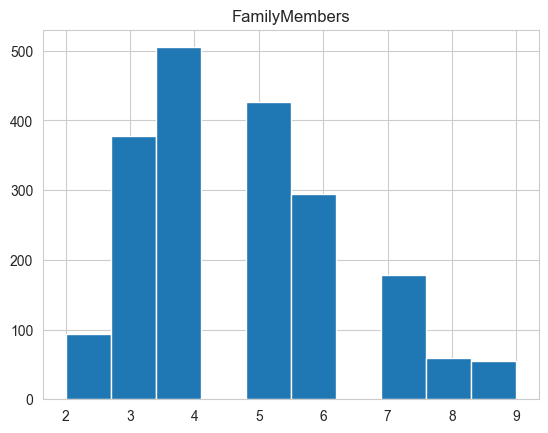

In [71]:
plt.hist(df["Age"])
plt.title("Histogram Age")
plt.show()

plt.hist(df["AnnualIncome"])
plt.title("Histogram AnnualIncome")
plt.show()


plt.hist(df["FamilyMembers"])
plt.title("FamilyMembers")
plt.show()

**Dari visualisasi boxplot diatas dapat kita ketahui bahwa tidak terdapat Outliers pada fitur numerik.**

### D. Feature transformation

Feature transformation adalah proses mengubah fitur asli menjadi fitur baru dengan tujuan meningkatkan kualitas model machine learning.
Pada tahap ini karena  Fitur Annual Income dan Family Member cenderung right skewed maka dilakukan Log Transformation, sedangkan Fitur Age dilakukan Standarisasi.

In [72]:
import warnings
warnings.filterwarnings("ignore", message="Auto-removal of overlapping axes is deprecated")

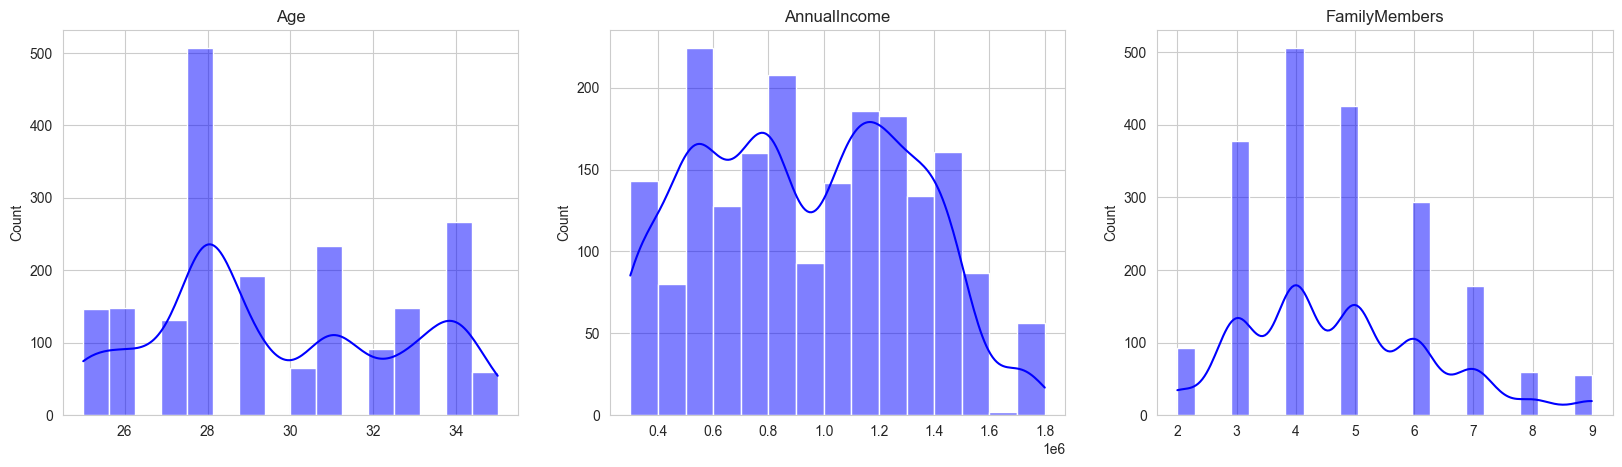

In [73]:
# set style
sns.set_style("whitegrid")

# define numeric columns
nums = ['Age', 'AnnualIncome', 'FamilyMembers']

# plot distribution using histplot
plt.figure(figsize=(20, 5))
for i, num in enumerate(nums):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[num], color='blue', kde=True)
    plt.title(num)
    plt.xlabel('')
plt.show()



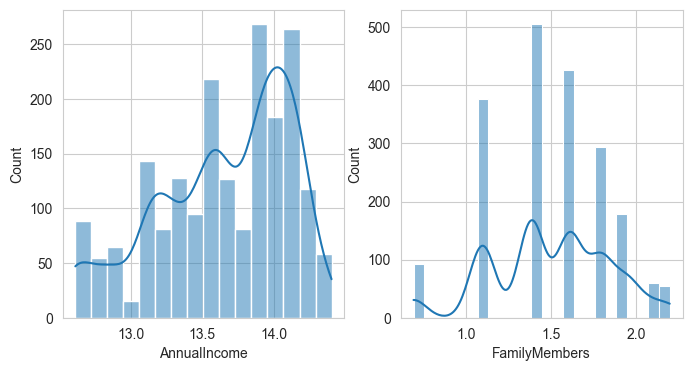

In [74]:
# log transformation
df['AnnualIncome'] = np.log(df['AnnualIncome'])
df['FamilyMembers'] = np.log(df['FamilyMembers'])

# visualisasi distribusi data setelah log transformation
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(data=df, x='AnnualIncome', kde=True, ax=axs[0])
sns.histplot(data=df, x='FamilyMembers', kde=True, ax=axs[1])

plt.show()

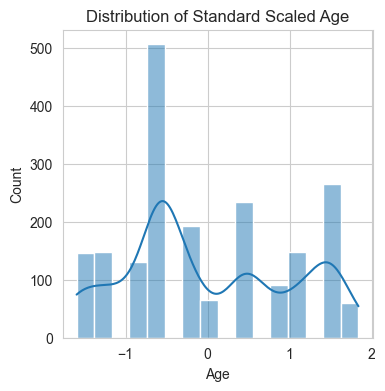

In [75]:
# standard scaling
scaler = StandardScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])

# visualisasi distribusi data setelah standard scaling
fig, axs = plt.subplots(figsize=(4, 4))
sns.histplot(data=df, x='Age', kde=True)
axs.set_title('Distribution of Standard Scaled Age')

plt.show()

### E. Feature encoding

**One-Hot Encoding pada variabel kategorikal**

Kolom EmploymentType, GraduateOrNot, FrequentFlyer, dan EverTravelledAbroad merupakan variabel kategorikal yang perlu diubah menjadi variabel numerik untuk dapat diproses oleh algoritma machine learning. Salah satu teknik encoding yang dapat digunakan adalah One-Hot Encoding.

In [76]:
# encoding variabel target menjadi numerik 0 dan 1
df["TravelInsurance"]= df["TravelInsurance"].replace({"not purchased": 0, "purchased": 1})

In [77]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.463430,Government Sector,Yes,12.899220,1.791759,Yes,No,No,0
1,0.463430,Private Sector/Self Employed,Yes,14.038654,1.945910,No,No,No,0
2,1.493446,Private Sector/Self Employed,Yes,13.122363,1.386294,Yes,No,No,1
3,-0.566587,Private Sector/Self Employed,Yes,13.458836,1.098612,Yes,No,No,0
4,-0.566587,Private Sector/Self Employed,Yes,13.458836,2.079442,Yes,Yes,No,0


In [78]:
# melakukan one-hot encoding pada kolom-kolom kategorikal
df_encoded = pd.get_dummies(df, columns=['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad', 'ChronicDiseases'],drop_first=True)

# menampilkan lima baris pertama dari dataframe yang telah diencode

print(df_encoded.head())

        Age  AnnualIncome  FamilyMembers  TravelInsurance  \
0  0.463430     12.899220       1.791759                0   
1  0.463430     14.038654       1.945910                0   
2  1.493446     13.122363       1.386294                1   
3 -0.566587     13.458836       1.098612                0   
4 -0.566587     13.458836       2.079442                0   

   Employment Type_Private Sector/Self Employed  GraduateOrNot_Yes  \
0                                             0                  1   
1                                             1                  1   
2                                             1                  1   
3                                             1                  1   
4                                             1                  1   

   FrequentFlyer_Yes  EverTravelledAbroad_Yes  ChronicDiseases_Yes  
0                  0                        0                    1  
1                  0                        0                    0  
2    

In [79]:
df_encoded.head()

,Age,AnnualIncome,FamilyMembers,TravelInsurance,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes,ChronicDiseases_Yes
0,0.463430,12.899220,1.791759,0,0,1,0,0,1
1,0.463430,14.038654,1.945910,0,1,1,0,0,0
2,1.493446,13.122363,1.386294,1,1,1,0,0,1
3,-0.566587,13.458836,1.098612,0,1,1,0,0,1
4,-0.566587,13.458836,2.079442,0,1,1,1,0,1


### E. Handle class imbalance


In [80]:
# Amount of people who will take the travel insurance
import plotly.express as px

fig = px.pie(df, names='TravelInsurance', color='TravelInsurance',
             color_discrete_map={1:'#acc8fc', 0:'#6f6cd4'},
             title='How many customers purchase the insurance?')
fig.update_traces(marker=dict(colors=['#E5D5F5', '#B5A5D5']))
fig.show()

**Karena yang purchased Travel Insurance 35.7% (masih diatas 10%) maka tidak termasuk data imbalance**

# 2. Feature Engineering 


### A. Feature selection (membuang feature yang kurang relevan atau redundan)

<AxesSubplot: >

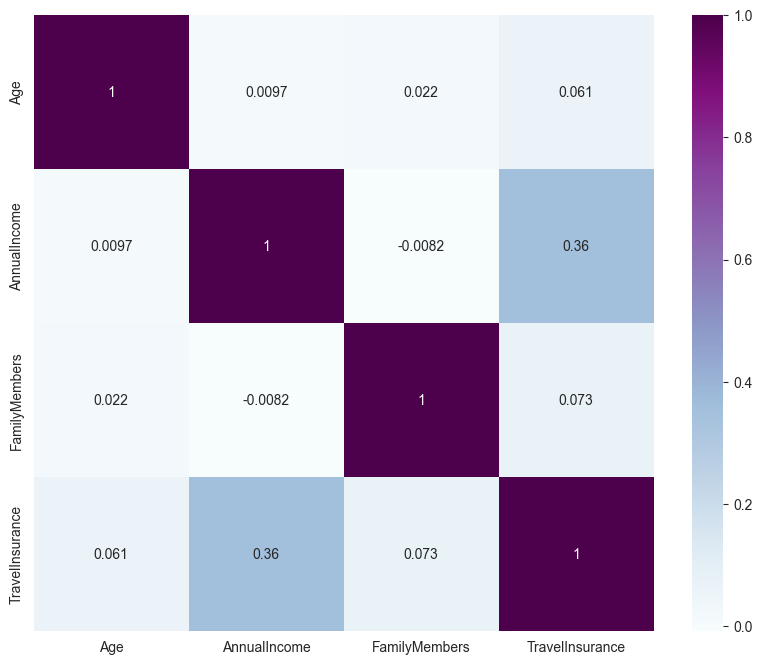

In [81]:
#Heatmap correlation

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='BuPu')

In [82]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

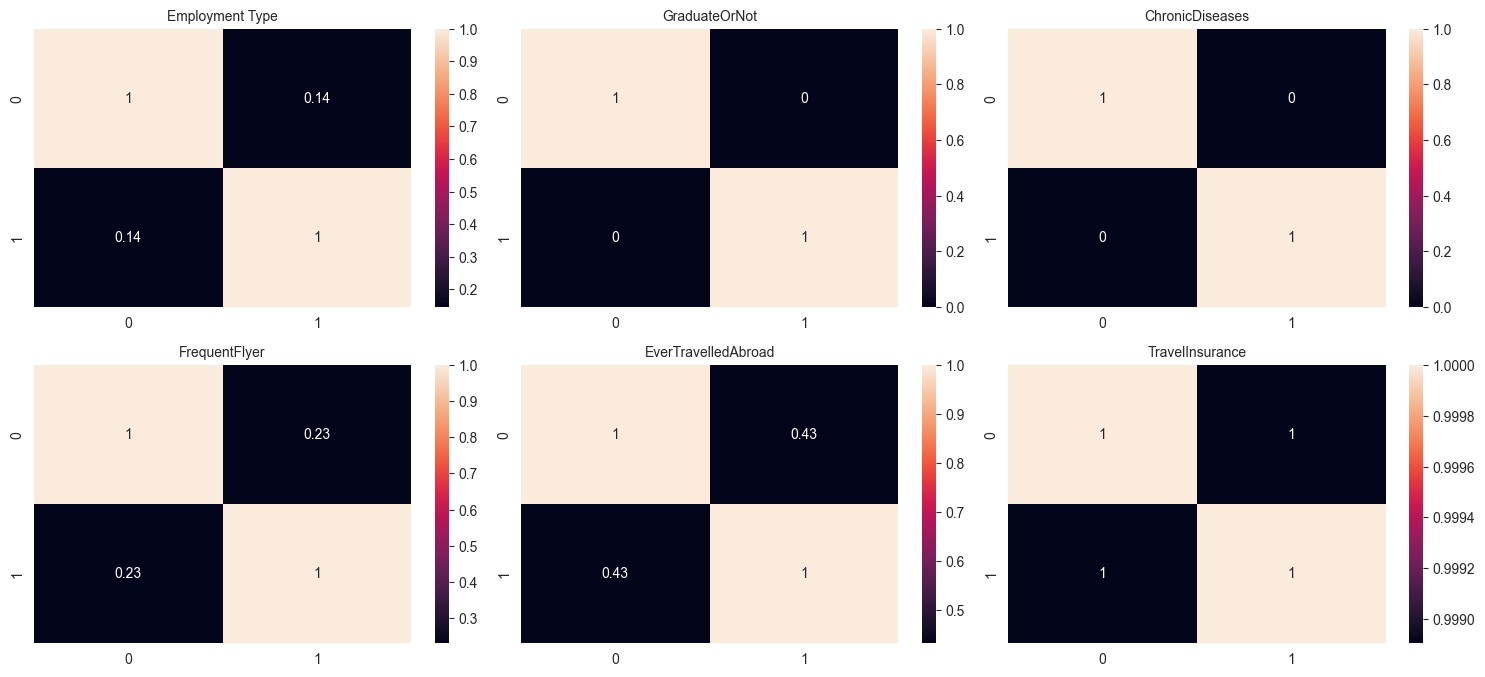

In [83]:
plt.figure(figsize=(15,10))
for x in range(0, len(cat)):
  plt.subplot(3, 3, x+1)
  corr = cramers_v(df[cat[x]], df["TravelInsurance"])
  sns.heatmap([[1, corr], [corr, 1]], annot=True)
  plt.title(cat[x], fontsize = 10)
  plt.tight_layout()

<AxesSubplot: >

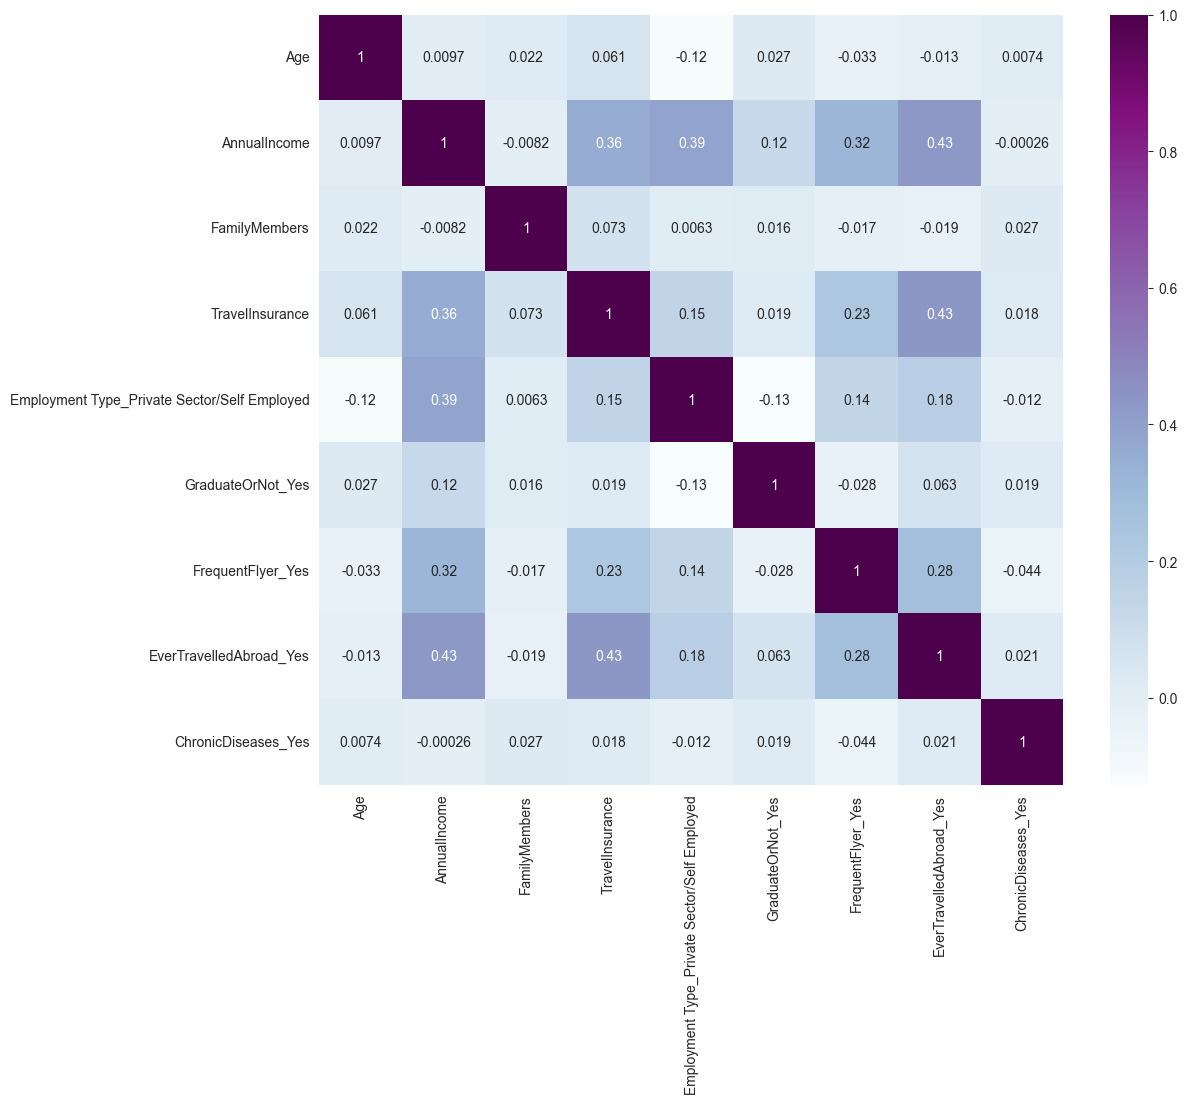

In [84]:
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(),annot=True, cmap='BuPu')

- Variabel yang cenderung berkorelasi dengan target variabel "TravelInsurance" adalah "EverTravelledAbroad", "FrequentFlyer" dan "AnnualIncome'. Variabel lain yang memiliki korelasi yang cukup signifikan dengan target variabel adalah "Employee type".
- Variabel yang memiliki korelasi rendah atau bahkan tidak berkorelasi dengan target variabel, seperti "FamilyMembers", "Age", "GraduateorNot", "FamilyMembers", dan "ChronicDiseases" dapat dianggap kurang relevan dan bisa dihapus dari dataset untuk mempermudah proses modeling.

Berdasarkan heatmap yang ditampilkan, terlihat bahwa tidak ada korelasi yang signifikan antara variabel-variabel dalam dataset. Semua variabel memiliki korelasi yang rendah dengan variabel lainnya, dengan nilai korelasi terbesar hanya sekitar 0.43. Ini menunjukkan bahwa setiap variabel memiliki informasi yang unik dan dapat memberikan kontribusi pada pembuatan model prediksi. **Jadi tidak ada feature yang dibuang atau redunden.**

### B. Feature extraction (membuat feature baru dari feature yang sudah ada)

Dari hasil heatmap di atas, tidak terlihat adanya korelasi yang cukup tinggi antara feature yang sudah ada sehingga tidak ada indikasi kuat untuk melakukan feature extraction (membuat feature baru dari feature yang sudah ada). 

### C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) 
Mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)

Beberapa fitur tambahan yang mungkin akan membantu meningkatkan performansi model:
1. Waktu perjalanan: Jika seseorang melakukan perjalanan selama musim liburan, kemungkinan besar mereka akan lebih cenderung membeli asuransi perjalanan karena risiko pembatalan atau perubahan jadwal yang lebih tinggi.
2. Durasi perjalanan: Jika seseorang melakukan perjalanan untuk jangka waktu yang lebih lama, misalnya beberapa minggu atau bahkan beberapa bulan, kemungkinan besar mereka akan lebih cenderung membeli asuransi perjalanan untuk melindungi diri mereka dari risiko yang terkait dengan perjalanan yang panjang.
3. Tujuan perjalanan bisnis atau liburan: Jika seseorang melakukan perjalanan untuk tujuan bisnis, mereka mungkin lebih cenderung membeli asuransi perjalanan untuk melindungi diri mereka dari risiko yang terkait dengan bekerja di tempat yang tidak familiar. Sebaliknya, jika seseorang melakukan perjalanan untuk tujuan liburan, mereka mungkin lebih cenderung membeli asuransi perjalanan untuk melindungi diri mereka dari risiko yang terkait dengan liburan, seperti kehilangan barang berharga atau sakit.
4. Tujuan perjalanan: Tujuan perjalanan mungkin juga mempengaruhi keputusan untuk membeli asuransi perjalanan. Tujuan yang lebih berisiko seperti destinasi ekspedisi gunung atau kegiatan olahraga ekstrem mungkin memotivasi pelanggan untuk membeli asuransi perjalanan.
5. Jenis transportasi: Jenis transportasi yang digunakan untuk perjalanan, seperti pesawat, kereta, atau mobil, dapat mempengaruhi keputusan untuk membeli asuransi perjalanan. Pelanggan yang menggunakan transportasi yang lebih berisiko seperti sepeda motor atau mobil sewaan mungkin lebih cenderung membeli asuransi perjalanan.
    